In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
import mlxtend as ml

In [0]:
import os

In [0]:
ls

drive/  sample_data/


In [0]:
cd drive/My\ Drive/DSF/Project/

/content/drive/My Drive/DSF/Project


In [0]:
df = pd.read_csv("costello_ace_2015-2016.csv", thousands=',', usecols=['Store Name','Item Description','Gross Margin'])

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
df1 = pd.read_csv("costello_ace_2017-2018.csv", thousands=',', usecols=['Store Name','Item Description','Gross Margin'])

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [0]:
df = df.append(df1)

In [0]:
df.head()

,Store Name,Item Description,Gross Margin
0,15784 EI PAINT,REG SEL INT MATTE BS1 GL,37.68
1,15784 EI PAINT,REG SEL INT MATTE BS2 GL,28.46
2,12168 WEST ISLIP,BLADE CUTOFF 4.5X1/16MTL,8.48
3,12168 WEST ISLIP,CUT WHL4-1/2X.045 MTL,17.56
4,12168 WEST ISLIP,GLOVE LTHR PALM WRK 3PK,9.53


In [0]:
df.shape

(32955543, 3)

In [0]:
df = df.drop(df[df['Gross Margin']=='Gross Margin'].index)

In [0]:
df = df.drop(df[df['Store Name']=='Store Name'].index)

In [0]:
df['Gross Margin'] = pd.to_numeric(df['Gross Margin'], errors='coerce')

In [0]:
df['Gross Margin'].min(skipna = True)

-106163.49

In [0]:
df.dropna(subset = ['Gross Margin'], inplace=True)

In [0]:
df.shape

(32955373, 3)

In [0]:
# cleaning up items which are not necessary for this analysis.
df = df[~df['Item Description'].str.contains('INST SAVINGS', na=False)]
df = df[~df['Item Description'].str.contains('GIFT CARD', na=False)]
df = df[~df['Item Description'].str.contains('REWARD', na=False)]
df = df[~df['Item Description'].str.contains('CERTIFICATE', na=False)]
df = df[~df['Item Description'].str.contains('REBATE', na=False)]
df = df[~df['Item Description'].str.contains('DEPOSIT', na=False)]
df = df[~df['Item Description'].str.contains('COUPON', na=False)]
df = df[~df['Item Description'].str.contains('Costello\'s Cash', na=False)]
df = df[~df['Item Description'].str.contains('\$5 OFF', na=False)]

In [0]:
df.shape

(31209370, 3)

In [0]:
df.head()

,Store Name,Item Description,Gross Margin
0,15784 EI PAINT,REG SEL INT MATTE BS1 GL,37.68
1,15784 EI PAINT,REG SEL INT MATTE BS2 GL,28.46
2,12168 WEST ISLIP,BLADE CUTOFF 4.5X1/16MTL,8.48
3,12168 WEST ISLIP,CUT WHL4-1/2X.045 MTL,17.56
4,12168 WEST ISLIP,GLOVE LTHR PALM WRK 3PK,9.53


In [0]:
x = df.groupby('Store Name')['Gross Margin'].sum().sort_values()

In [0]:
x.head(15)

Store Name
13168 BOHEMIA WAREHOUSE   -2.215000e+01
CLOSED CENTEREACH          8.105656e+05
16791 STATEN ISLAND        9.756725e+05
16476 MELVILLE             1.000959e+06
5144 DEER PARK AVE         1.381830e+06
7504 GRAND BLVD            1.453190e+06
16660 GLEN BURNIE          1.724118e+06
15998 BALDWIN HARBOR       1.990282e+06
15784 EI PAINT             2.114935e+06
15444 GREAT NECK           2.420561e+06
16324 BROOKLYN             2.652966e+06
15280 EAST ISLIP           3.040136e+06
16354 LINCOLN PARK         3.370092e+06
12168 WEST ISLIP           3.761309e+06
15348 ROCKY POINT          3.790078e+06
Name: Gross Margin, dtype: float64

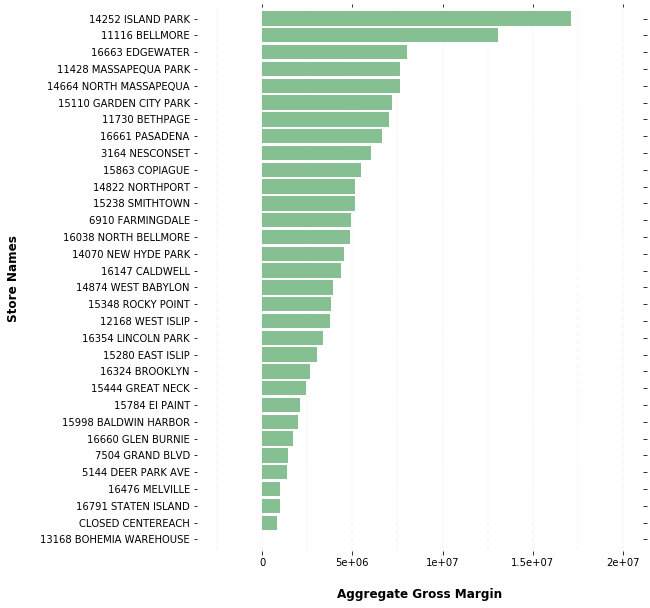

In [0]:
# plotting store-wise gross margin
from matplotlib.ticker import StrMethodFormatter

ax = x.plot(kind='barh', figsize=(8, 10), color='#86bf91', zorder=2, width=0.85)

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set x-axis label
ax.set_xlabel("Aggregate Gross Margin", labelpad=20, weight='bold', size=12)

# Set y-axis label
ax.set_ylabel("Store Names", labelpad=20, weight='bold', size=12)

# Format y-axis label
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

In [0]:
neg_gross_margin_df = df[df['Gross Margin']<0]

In [0]:
neg_gross_margin_df.shape

(1857852, 3)

In [0]:
x_neg = neg_gross_margin_df.groupby('Store Name')['Gross Margin'].sum().sort_values()

In [0]:
x_neg.tail(15)

Store Name
14874 WEST BABYLON        -308507.89
16354 LINCOLN PARK        -308280.84
CLOSED CENTEREACH         -306883.83
12168 WEST ISLIP          -294851.50
15348 ROCKY POINT         -270990.32
15280 EAST ISLIP          -244806.92
15444 GREAT NECK          -213940.31
16324 BROOKLYN            -191250.38
15998 BALDWIN HARBOR      -176559.45
16660 GLEN BURNIE         -114641.97
16476 MELVILLE             -92695.99
16791 STATEN ISLAND        -67726.06
7504 GRAND BLVD            -65993.11
15784 EI PAINT             -65487.24
13168 BOHEMIA WAREHOUSE     -1101.85
Name: Gross Margin, dtype: float64

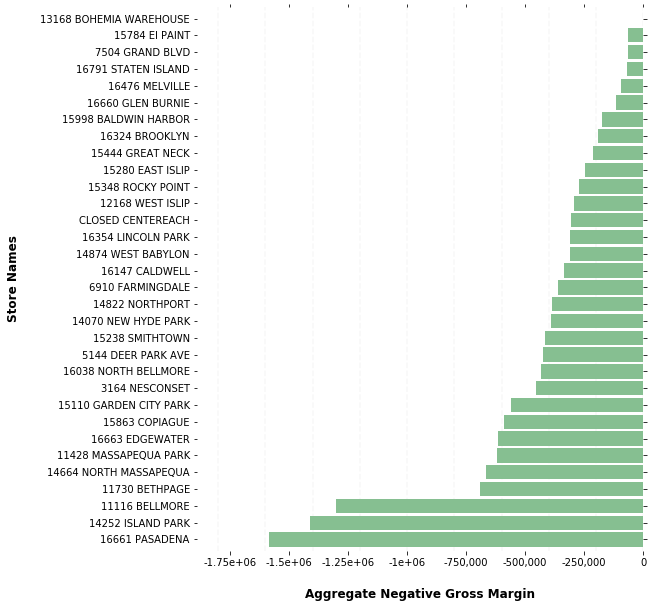

In [0]:
# store-wise negative gross margin
ax = x_neg.plot(kind='barh', figsize=(8, 10), color='#86bf91', zorder=2, width=0.85)

# Despine
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

# Switch off ticks
ax.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="on", left="off", right="off", labelleft="on")

# Draw vertical axis lines
vals = ax.get_xticks()
for tick in vals:
    ax.axvline(x=tick, linestyle='dashed', alpha=0.4, color='#eeeeee', zorder=1)

# Set x-axis label
ax.set_xlabel("Aggregate Negative Gross Margin", labelpad=20, weight='bold', size=12)

# Set y-axis label
ax.set_ylabel("Store Names", labelpad=20, weight='bold', size=12)

# Format y-axis label
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,g}'))

Loss Leader analysis for 'Island Park' store:

In [0]:
island_park_negGross_df = neg_gross_margin_df[neg_gross_margin_df['Store Name']=="14252 ISLAND PARK"]

In [0]:
island_park_negGross_df.head()

,Store Name,Item Description,Gross Margin
30,14252 ISLAND PARK,STRAINER MESH SHWR 3-3/8,-4.59
95,14252 ISLAND PARK,SHELF STNDRD 2' BLK BX,-7.80
272,14252 ISLAND PARK,"VINYL HEAVY8GA 54""X36YDS",-22.87
550,14252 ISLAND PARK,QTVALV1/2FIPX3/8ODANGLF,-4.52
551,14252 ISLAND PARK,QTVALV1/2FIPX3/8ODANGLF,-4.52


In [0]:
x_island_park_negGross = island_park_negGross_df.groupby('Item Description')['Gross Margin'].sum().sort_values().head(15)

In [0]:
x_island_park_negGross.head(15)

Item Description
FASTENERS                          -5362.26
FASTENERS/SCREWS/NAILS/BOLTS ETC   -5053.96
LAWN FOOD 5M                       -4757.97
LED FEIT BR30 65W EQ SW            -4375.95
BEN INT EGGSHL BASE1 GL            -3962.56
DAP XHOSE PRO 50'                  -3834.14
BIRDSEED WILDBIRD 20#ACE           -3638.32
TOP SOIL 40#                       -3393.03
CANOPY 10' X 10'                   -3376.37
BATTRY ALKLN RAYO D PK12           -2853.51
MURESCO CEILING WHITE GAL          -2719.64
LED FEIT A19 60W EQ WW             -2243.37
DITTO LED DIMMABLE BR30/2PK.       -2111.16
LA 10' UMBRELLA W/40LED            -2007.58
3-PERSON DELUXE SWING              -2006.93
Name: Gross Margin, dtype: float64

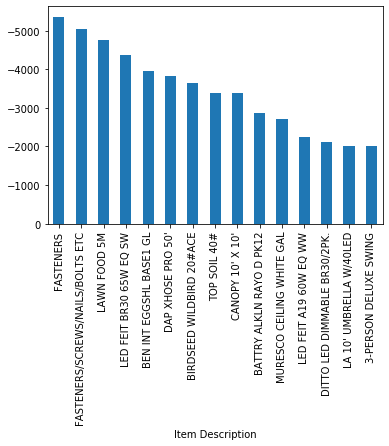

In [0]:
ax = x_island_park_negGross.plot.bar(x='Item Description', y='Gross Margin', rot=90)
plt.gca().invert_yaxis()

Loss Leader analysis for 'Pasadena' store:

In [0]:
pasadena_negGross_df = neg_gross_margin_df[neg_gross_margin_df['Store Name']=="16661 PASADENA"]

In [0]:
x_pasadena_negGross = pasadena_negGross_df.groupby('Item Description')['Gross Margin'].sum().sort_values().head(15)

In [0]:
x_pasadena_negGross.head(15)

Item Description
20# NUT AND BERRY BUDDIES          -1125734.42
WIRE 12/2-NMWG 250'                  -29570.51
PROPANE PER GALLON                   -12179.37
40# OMALLEY HARDWOOD PELLETS-BAG      -7645.63
LAWN FOOD 5M                          -5126.08
ANNUALS - 6 CELL MKT PACK             -4347.61
TON OF PELLETS-LIGNETICS              -4094.50
FASTENERS                             -3991.44
BIRDSEED WILDBIRD 20#ACE              -3933.84
FUEL WOOD PELLETS 40#SKD              -3501.97
SEED GERANIUMS                        -3341.78
JUMBO MKT PACK 804/806 FLWR/VEG       -2728.77
BIRDSEED SONGBRD WB7# KT              -2604.35
NESTLE PURE LIFE 24PK.5L              -2569.46
ACE ANNUALS - $1.49 PRICE POINT       -2386.98
Name: Gross Margin, dtype: float64

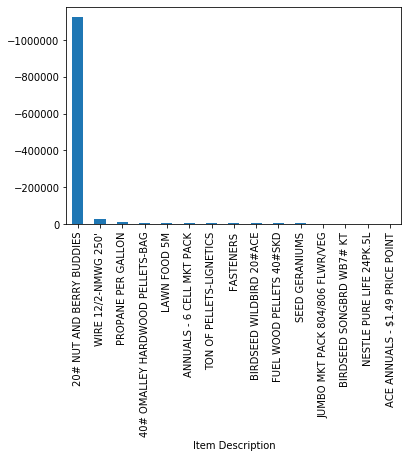

In [0]:
ax = x_pasadena_negGross.plot.bar(x='Item Description', y='Gross Margin', rot=90)
plt.gca().invert_yaxis()

In [0]:
x_pasadena_negGross.drop(labels = ['20# NUT AND BERRY BUDDIES'],inplace=True)

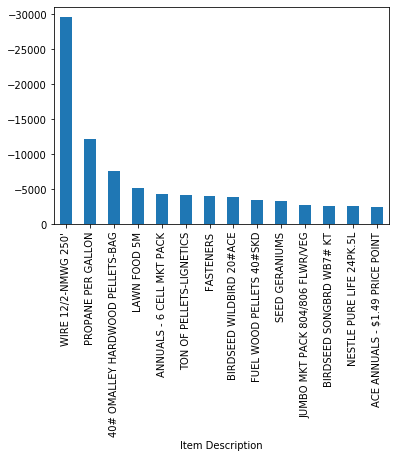

In [0]:
ax = x_pasadena_negGross.plot.bar(x='Item Description', y='Gross Margin', rot=90)
plt.gca().invert_yaxis()

In [0]:
# temp_d = df[df['Item Description']=='20# NUT AND BERRY BUDDIES']

In [0]:
# temp_d = temp_d[temp_d['Gross Margin']>0]

In [0]:
# temp_d.groupby('Item Description')['Gross Margin'].sum()

Item Description
20# NUT AND BERRY BUDDIES    13290.54
Name: Gross Margin, dtype: float64

In [0]:
# temp_d.groupby('Item Description')['Gross Margin'].sum()  

Item Description
20# NUT AND BERRY BUDDIES    1139074.12
Name: Gross Margin, dtype: float64

Loss Leader analysis for 'Brooklyn' store:

In [0]:
brooklyn_negGross_df = neg_gross_margin_df[neg_gross_margin_df['Store Name']=="16324 BROOKLYN"]
x_brooklyn_negGross = brooklyn_negGross_df.groupby('Item Description')['Gross Margin'].sum().sort_values().head(30)
x_brooklyn_negGross.head(20)

Item Description
FASTENERS/SCREWS/NAILS/BOLTS ETC   -9174.13
NOTIONS/SNACKS & MISC.             -4035.76
GRILL LP PERFORM 475               -3461.63
SNAP-IN BINTAG HLDR47.7"           -2457.90
APPLIANCES & HOME ENTERTAINMENT    -2450.47
FASTENERS                          -2274.16
HWH DRL SCR 12-14X2      100       -1402.23
COSTELLOS BUCKS $10                -1280.00
65W 9BR30 LED FLOOD LIGHT-6PK      -1108.73
Nest for Large EGG with 2 lock     -1088.09
SUMMIT S-620 LP SS                  -791.21
TUBE VINYL 3/4"IDX1"OD              -577.65
LED MINI WHT 24.5' 100CT            -572.90
SNOWMAN 48"FLUFFY TOP HAT           -570.71
Marquee Deluxe Carousel             -569.95
CM QUIET SNOWTHROWER 26"            -543.92
LED MINI WW 74.5' 300CT             -534.88
BUMPER BUSTER                       -520.40
GENESIS EP-310 LP SMOKE             -498.92
LED FEIT A19 60W EQ WW              -485.44
Name: Gross Margin, dtype: float64

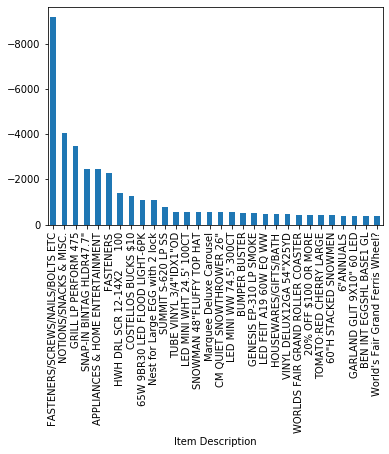

In [0]:
ax = x_brooklyn_negGross.plot.bar(x='Item Description', y='Gross Margin', rot=90)
plt.gca().invert_yaxis()